##  Desafio Expansiones Basales
### Camila Vera Villa

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
#import lec2_graphs as afx

#  sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,median_absolute_error

from pygam import LinearGAM
from pygam.utils import generate_X_grid

import warnings
warnings.filterwarnings("ignore")

In [63]:
#conda install -c conda-forge pygam=0.5.2=py_0 

#### Ejercicio 1: Preparar el ambiente de trabajo
* Importe los módulos clásicos del trabajo en ciencia de datos.
* El archivo tiene el nombre compresive_strength_concrete.csv . Impórtelo y genere estadísticas descriptivas.
* En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM .

In [64]:
#importacion dataset
df = pd.read_csv('compresive_strength_concrete.csv')
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [65]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [66]:
#pandas_profiling.ProfileReport(df, correlation_threshold = 1)

Estadísticas Descriptivas

In [67]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

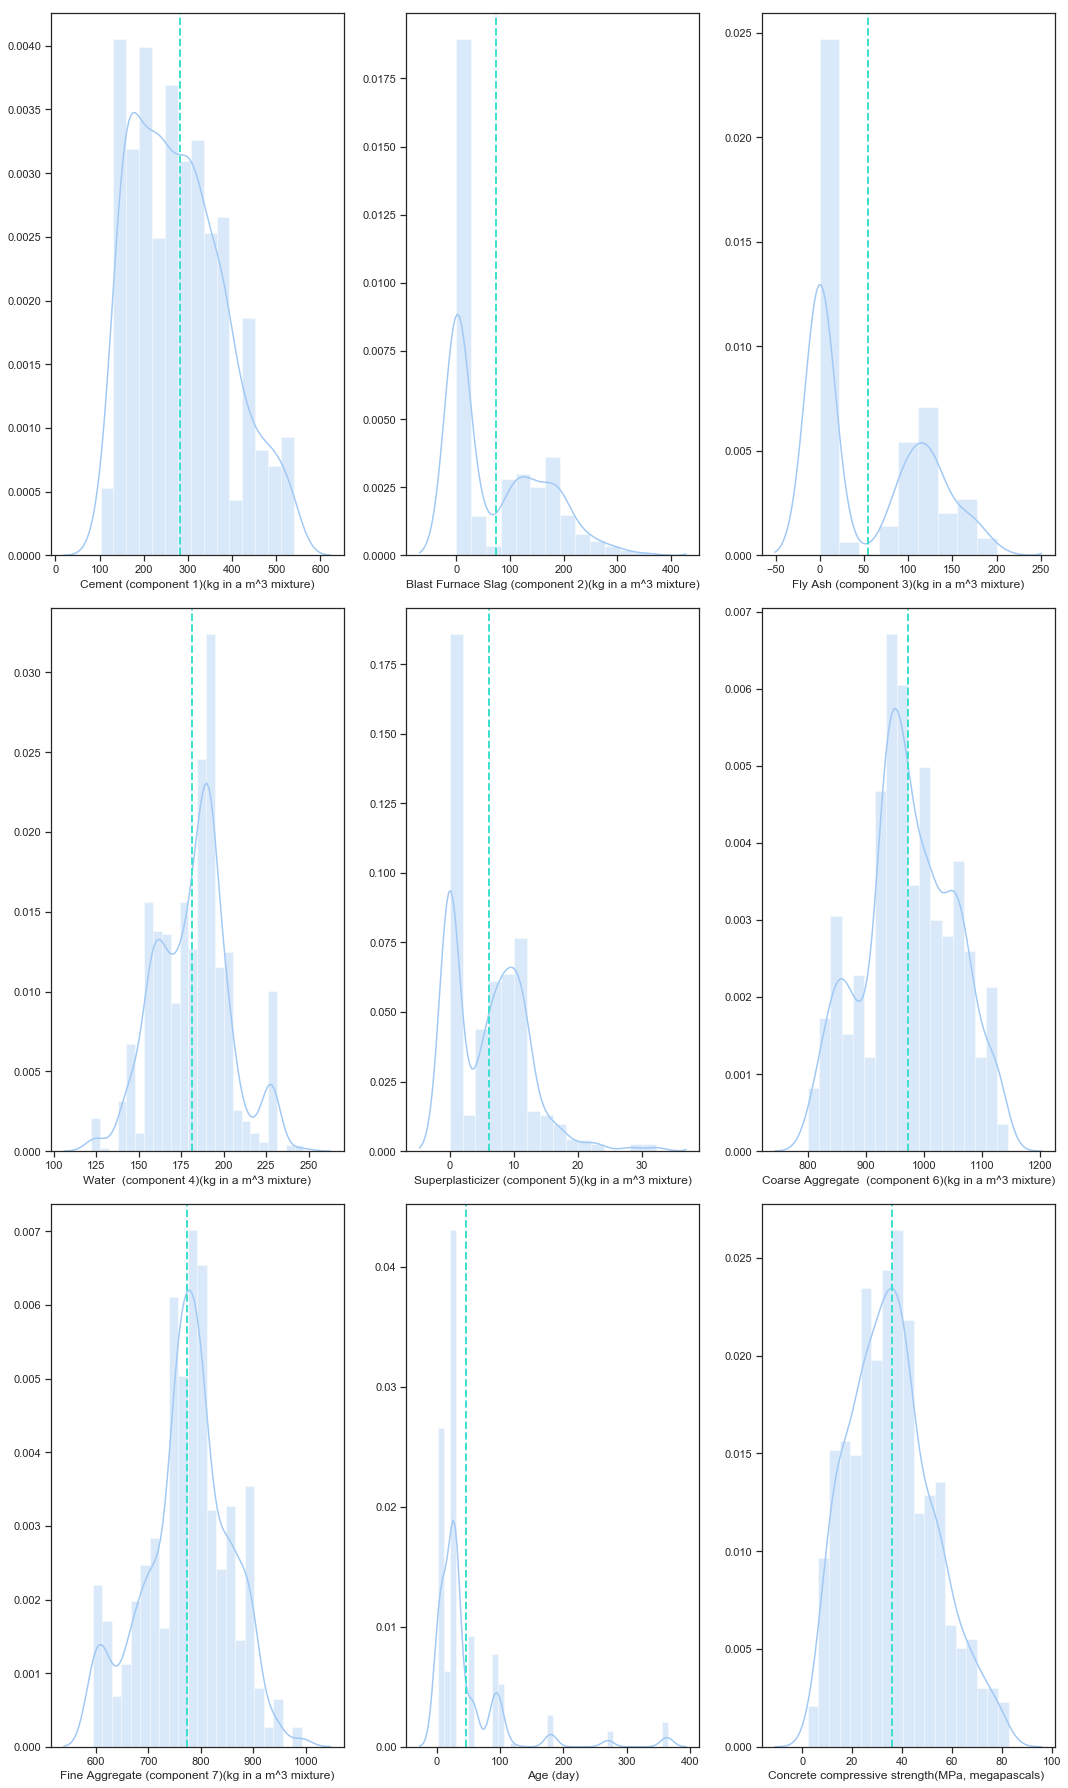

In [68]:
plt.figure(figsize=(15, 25))

for n, col in enumerate (df.columns):
    plt.subplot(3, 3, n + 1)
    sns.distplot(df[col])
    plt.axvline(df[col].mean(), color = "turquoise", linestyle = "--", lw = 2) #media    
    plt.tight_layout()

### Ejercicio 2: Descripción
* El vector objetivo tiene el nombre de **Concrete compressive strength(MPa, megapascals)**
* Los nombres de las variables son muy poco amigables, dado que contienen espacios,paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc
* Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución.
* Decida si es necesario normalizarlos/escalarlos.

In [69]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [70]:
# Renombrar variables
df.columns = ['cement', 'blast','fly_ash', 'water', 'superplasticizer', 'coarse', 'fine','age', 'concrete_compressive']
df.head()

,cement,blast,fly_ash,water,superplasticizer,coarse,fine,age,concrete_compressive
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [71]:
#Tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                  1030 non-null float64
blast                   1030 non-null float64
fly_ash                 1030 non-null float64
water                   1030 non-null float64
superplasticizer        1030 non-null float64
coarse                  1030 non-null float64
fine                    1030 non-null float64
age                     1030 non-null int64
concrete_compressive    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [72]:
# ciclo para obtener las estadísticas descriptivas de las variables

for i in df:
    if len(df[i].value_counts()) > 2:
         print(df[i].describe(), "\n")
    else:
        print(df[i].value_counts('%'), "\n")

count    1030.000000
mean      281.167864
std       104.506364
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64 

count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: blast, dtype: float64 

count    1030.000000
mean       54.188350
std        63.997004
min         0.000000
25%         0.000000
50%         0.000000
75%       118.300000
max       200.100000
Name: fly_ash, dtype: float64 

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64 

count    1030.000000
mean        6.204660
std         5.973841
min         0.000000
25%         0.000000
50%         6.400000
75%        10.200000
max        32.200000
Name: superplasticizer, dtype: float6

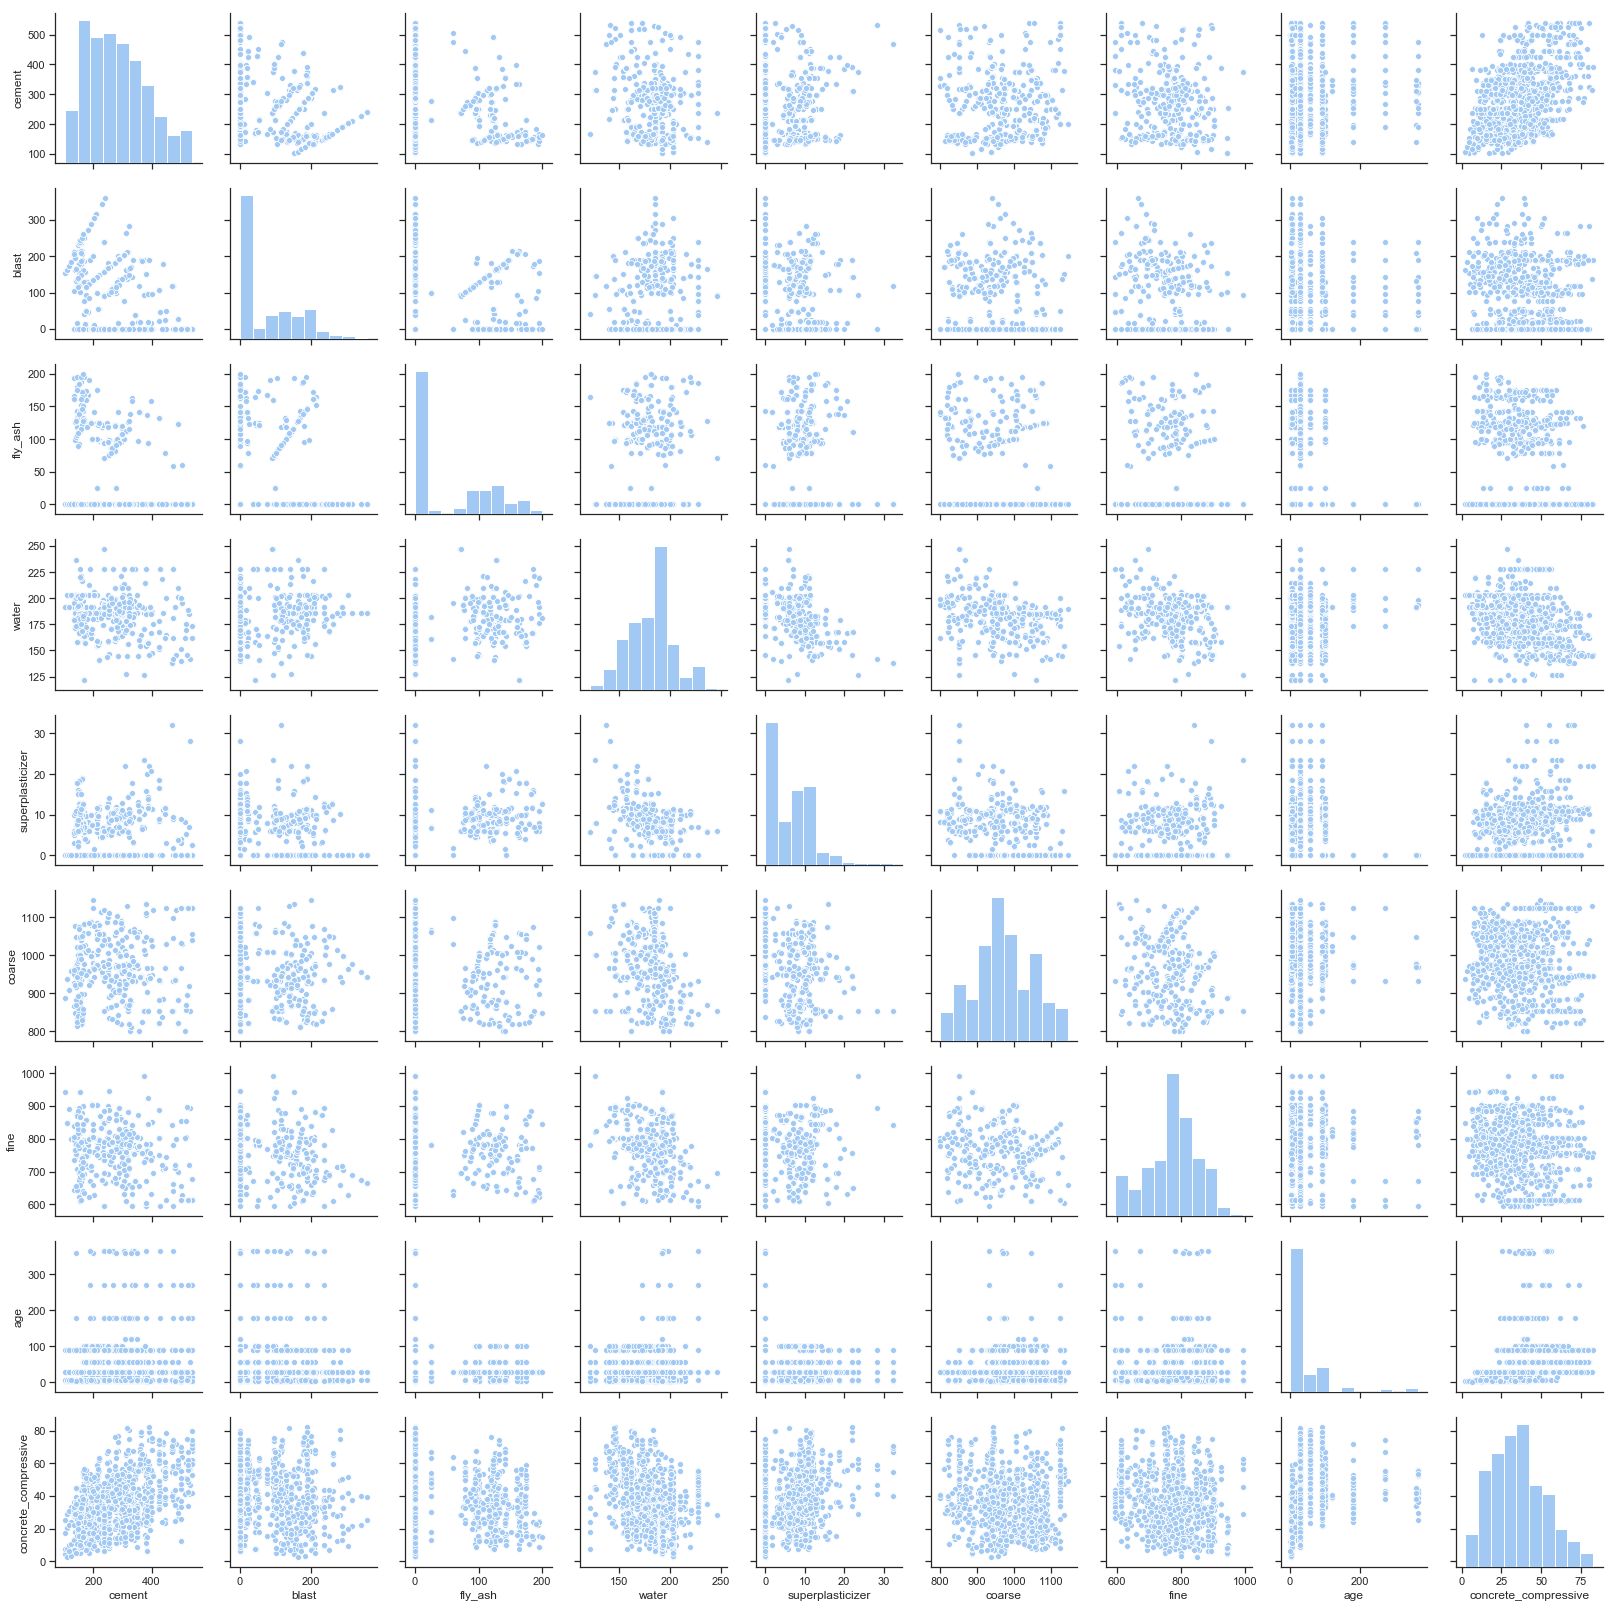

In [73]:
sns.pairplot(df)
sns.set(style="ticks", palette ="pastel")

### Ejercicio 3: Modelo
* En base al vector objetivo, decida el mejor modelo e impórtelo con pygam . Condicional a ésto,importe las métricas de desempeño asociadas.
* Genere conjuntos de entrenamiento y validación.
* Genere un primer modelo sin implementar la función gridsearch . Repórte el
hiperparámetro lam así como las métricas de desempeño asociadas.
* Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. 
* Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

#### Conjuntos de entrenamiento y validación

In [74]:
df.columns

Index(['cement', 'blast', 'fly_ash', 'water', 'superplasticizer', 'coarse',
       'fine', 'age', 'concrete_compressive'],
      dtype='object')

In [75]:
#Generacion de conjuntos de entrenamiento y validacion

x = df.drop('concrete_compressive', axis = 1) #quitar columna de vector objetivo 'concrete_compressive'
y = df['concrete_compressive']

#separacion de subsets de test y train
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 25)


In [76]:
# Escalar df
std_scaler = StandardScaler().fit(x_train)
x_train = std_scaler.transform(x_train)
x_test = std_scaler.transform(x_test)

df_scaled = pd.DataFrame(x_train, columns = x.columns)
df = df_scaled

In [77]:
# métricas de evaluacion de desempeño: r2_score , mean_squared_error y median_absolute_error

def report_gam_metrics(model, x_test, y_test):
    print('Test R^2 accuracy: {0}'.format(r2_score(y_test, model.predict(x_test)).round(3)))
    print('Test RMSE accuracy: {0}'.format(np.sqrt(mean_squared_error(y_test, model.predict(x_test))).round(3)))
    print('Test MAE accuracy: {0}'.format(median_absolute_error(y_test,model.predict(x_test)).round(3)))
#report_gam_metrics(gam, x_test, y_test)

#### Modelo sin implementar la función gridsearch

In [78]:
linear_gam_model = LinearGAM().fit(x_train, y_train)

C:\Users\camve\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


In [79]:
report_gam_metrics(linear_gam_model, x_test, y_test)

Test R^2 accuracy: 0.894
Test RMSE accuracy: 5.366
Test MAE accuracy: 3.269


In [80]:
linear_gam_model.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     96.1691
Link Function:                     IdentityLink Log Likelihood:                                 -2990.8442
Number of Samples:                          721 AIC:                                             6176.0264
                                                AICc:                                            6206.6575
                                                GCV:                                               32.5259
                                                Scale:                                             24.8236
                                                Pseudo R-Squared:                                   0.9236
Feature Function   Data Type      Num

#### Modelo implementando gridsearch en lambda con un logspace entre -3 y 3.


In [81]:
# definimos el rango de hiperparámetros a evaluar
search_params = {'lam': np.logspace(-3, 3, 8)}

# Creamos el modelo, lo entrenamos y buscamos los hiperparámetros mediante gridsearch
gs_linear_gam_model = LinearGAM().gridsearch(x_train, y_train, **search_params)

N/A% (0 of 8) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--C:\Users\camve\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 12% (1 of 8) |###                       | Elapsed Time: 0:00:00 ETA:  00:00:00C:\Users\camve\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 25% (2 of 8) |######                    | Elapsed Time: 0:00:00 ETA:   0:00:00C:\Users\camve\Anaconda3\li

In [82]:
report_gam_metrics(gs_linear_gam_model,x_test, y_test)

Test R^2 accuracy: 0.895
Test RMSE accuracy: 5.341
Test MAE accuracy: 3.239


In [83]:
gs_linear_gam_model.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     102.943
Link Function:                     IdentityLink Log Likelihood:                                 -2977.6425
Number of Samples:                          721 AIC:                                             6163.1709
                                                AICc:                                            6198.5835
                                                GCV:                                               32.6324
                                                Scale:                                               24.37
                                                Pseudo R-Squared:                                   0.9258
Feature Function   Data Type      Num

Con base a las metricas de desempeno se puede concluir que el mejor modelo corresponde al que se le aplico la funcion gridsearch. El error absoluto medio es de 3.456, menor al modelo inicial, el cual reporto un MAE de 3.585. Respecto al error cuadratico medio del modelo con gridsearch, este corresponde a 5.485, siendo menor que 5.544 (modelo sin Gs)

Metricas:

***Sin Gridsearch:***
* Test R^2 accuracy: 0.887
* Test RMSE accuracy: 5.544
* Test MAE accuracy: 3.585

***Con Gridsearch:***
* Test R^2 accuracy: 0.89
* Test RMSE accuracy: 5.485
* Test MAE accuracy: 3.456

### Ejercicio 4: Dependencia Parcial
* En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
* Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
* Reporte brevemente sobre qué atributos están asociados a mayores y menores niveles de resistencia.

In [84]:
from pygam.utils import generate_X_grid

In [85]:
df.columns

Index(['cement', 'blast', 'fly_ash', 'water', 'superplasticizer', 'coarse',
       'fine', 'age'],
      dtype='object')

In [86]:
def dep_parcial_graficos (model):
    
    #array que contenga los valores de cada atributo
    x_grid = generate_X_grid(model)
    attribute = df.columns
    
    #generamos el dimensionado del grid en base a la cantidad de atributos
    cols = 4; rows = np.ceil(len(attribute) / cols)
    plt.figure(figsize=(15,10))
    
    # para cada atributo
    for i, n in enumerate(range(len(attribute))):
        plt.subplot(rows, cols, i + 1)
        # extraemos la dependencia parcial y sus intervalos de confianza al 95%
        partial_dep, confidence_intervals = model.partial_dependence(x_grid, feature
        = i + 1, width=0.95)

        # Visualizamos la recta
        plt.plot(x_grid[:, n], partial_dep, color='yellowgreen')

        # Generamos una visualización de los intervalos de confianza
        plt.fill_between(x_grid[:, n],
        confidence_intervals[0][:, 0],
        confidence_intervals[0][:, 1],
        color='yellowgreen', alpha=.25)

        # agregamos el nombre del atributo
        plt.title(attribute[n])
        plt.plot(df[attribute[n]], 
            [plt.ylim()[0]] * len(df[attribute[n]]),
            '|', color='orange', alpha=.5)
    plt.tight_layout()

C:\Users\camve\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


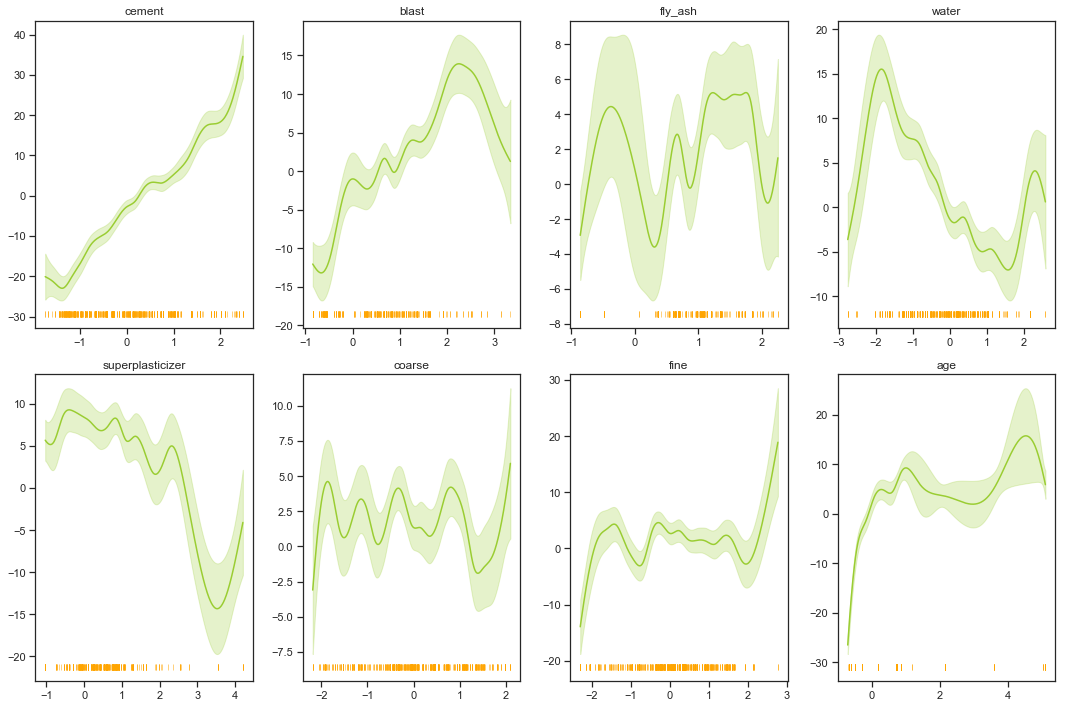

In [87]:
dep_parcial_graficos(gs_linear_gam_model)

* La fuerza compresiva de las vigas de concreto, se ven afectadas negativamente con los atributos agua y superplasticidad, los cuales se asocian a  menores niveles de resistencia.
* El atributo 'cemento', parece aportar linealmente a la fuerza compresiva.
* El atributo 'superplasticizer' tiene un unico minimo, lo que puede indicar que la relacion entre este y la fuerza compresiva no es determinante.

                                                        ***